In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#### Data Loading
Load n episodes from each channel

In [2]:
n = 50
MOKHBIR_DIR = "./Al_Mokhbir_Al_Eqtisadi/"
DA7EE7_DIR = "./Da7ee7/"
HADARAA_DIR = "./Fi_Al_Hadaraa/"

In [3]:
def data_loader(dir_path: str, n: int, read_metadata: bool = False) -> pd.DataFrame:
    """
    Load episode transcripts from text files and optionally add metadata.

    :param dir_path: Path to the directory containing 'raw_data' and 'metadata' folders.
    :param n: Number of episodes to read.
    :param read_metadata: Whether to include metadata from JSON files.
    :return: A pandas DataFrame.
    """
    data_dir_path = os.path.join(dir_path, "raw_data")
    metadata_dir_path = os.path.join(dir_path, "metadata") if read_metadata else None

    episodes = []
    
    # Read the first `n` .txt files
    txt_files = [file for file in os.listdir(data_dir_path) if file.endswith(".txt")][:n]

    for file in txt_files:
        base_name = file.replace(".txt", "")
        file_path = os.path.join(data_dir_path, file)

        with open(file_path, 'r', encoding="utf-8") as f:
            episode_data = {"file_name": base_name, "episode_transcript": f.read().strip()}

        # Read metadata if needed
        if read_metadata:
            metadata_path = os.path.join(metadata_dir_path, base_name + ".json")
            if os.path.exists(metadata_path):
                with open(metadata_path, 'r', encoding="utf-8") as f:
                    episode_data["length"] = json.load(f).get("length", None)
            else:
                episode_data["length"] = None  # Handle missing metadata

        episodes.append(episode_data)

    return pd.DataFrame(episodes)

In [4]:
mokhbir_df = data_loader(MOKHBIR_DIR, n, read_metadata=True)
da7ee7_df = data_loader(DA7EE7_DIR, n, read_metadata=False)
hadaraa_df = data_loader(HADARAA_DIR, n, read_metadata=True)
mokhbir_df.info(), da7ee7_df.info(), hadaraa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           50 non-null     object
 1   episode_transcript  50 non-null     object
 2   length              50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           50 non-null     object
 1   episode_transcript  50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           50 non-null     object
 1   episode_transcript  50 non-n

(None, None, None)

In [5]:
mokhbir_df.head()


,file_name,episode_transcript,length
0,المخبر_الاقتصادي__ما_علاقة_أمريكا_بالطائرة_الت...,ايران واذربيجان بينهم حدود طولها يتجاوز\nال 75...,00:26:06
1,المخبر_الاقتصادي__لماذا_دمرت_إسرائيل_مطار_غزة_...,قطاع غزه بيتعرض في الاسابيع الاخيره\nلعدوان اج...,00:13:33
2,المخبر_الاقتصادي__هل_تنجح_خطة_أمريكا_وأوروبا_ل...,الدول الغربية بقيادة الولايات المتحدة\nمستمرة ...,00:15:22
3,المخبر_الاقتصادي__كيف_استطاع_الأغنياء_اليهود_إ...,في 8 اكتوبر 2023 وبعد يوم واحد من انطلاق\nعملي...,00:22:47
4,المخبر_الاقتصادي__لماذا_يكره_الفرنسيون_الدولار...,في 26 يناير سنه 1968 صحيفه انترناشونال\nهيرال ...,00:15:46


#### Correlation between transcript length and actual episode length
- for Mokhbir El Eqtisadi and Fi Al Hadaraa only (no length in Da7ee7 metadata)

In [6]:
def parse_length(length:str):
    """
    Parse the length of the episode from the metadata
    :param length: the length of the episode as a string in the format 'hh:mm:ss'
    :return: the length in seconds
    """
    h, m, s = map(int, length.split(':'))
    return int(h * 3600 + m * 60 + s)

In [7]:
mokhbir_df['length'] = mokhbir_df['length'].apply(parse_length)
hadaraa_df['length'] = hadaraa_df['length'].apply(parse_length)

In [8]:
mokhbir_df['length'].describe(), hadaraa_df['length'].describe()

(count      50.000000
 mean     1071.300000
 std       268.534211
 min        35.000000
 25%       925.250000
 50%      1044.500000
 75%      1235.500000
 max      1637.000000
 Name: length, dtype: float64,
 count      50.000000
 mean     1074.300000
 std       325.626194
 min        58.000000
 25%       909.500000
 50%      1064.500000
 75%      1251.500000
 max      1861.000000
 Name: length, dtype: float64)

In [9]:
# add transcript length to the dataframes word count
mokhbir_df['transcript_length'] = mokhbir_df['episode_transcript'].apply(lambda x: len(x.split()))
hadaraa_df['transcript_length'] = hadaraa_df['episode_transcript'].apply(lambda x: len(x.split()))

mokhbir_df.info(), hadaraa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           50 non-null     object
 1   episode_transcript  50 non-null     object
 2   length              50 non-null     int64 
 3   transcript_length   50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           50 non-null     object
 1   episode_transcript  50 non-null     object
 2   length              50 non-null     int64 
 3   transcript_length   50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


(None, None)

##### Calculate and plot correlation

Correlation : 0.9785747007889184


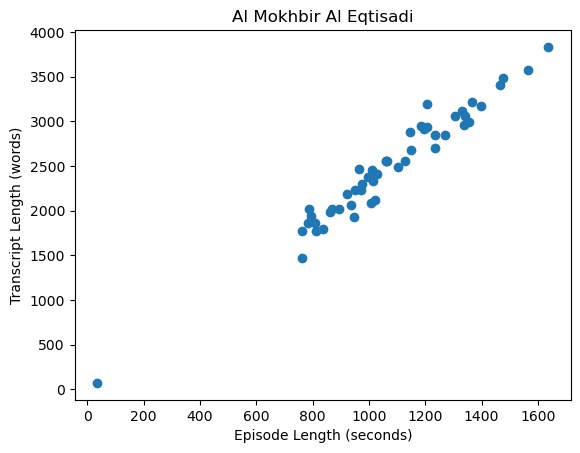

In [10]:
corr = mokhbir_df['length'].corr(mokhbir_df['transcript_length'])
print(f"Correlation : {corr}")

plt.scatter(mokhbir_df['length'], mokhbir_df['transcript_length'])
plt.xlabel('Episode Length (seconds)')
plt.ylabel('Transcript Length (words)')
plt.title('Al Mokhbir Al Eqtisadi')
plt.show()



Correlation : 0.9855067727420913


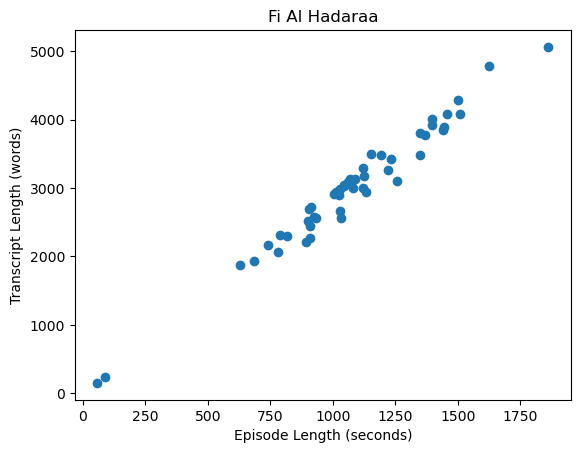

In [11]:
corr = hadaraa_df['length'].corr(hadaraa_df['transcript_length'])
print(f"Correlation : {corr}")

plt.scatter(hadaraa_df['length'], hadaraa_df['transcript_length'])
plt.xlabel('Episode Length (seconds)')
plt.ylabel('Transcript Length (words)')
plt.title('Fi Al Hadaraa')
plt.show()

The High Correlation between the transcript length and the actual episode length is expected, as the transcript length is a good indicator of the episode length in general.

#### Clustering sample of episodes based on TF-IDF vectors of the transcript to find if the data is usable for clustering or not
- Visualize the episodes using UMAP (2D and 3D)
- Use KMeans to cluster the data 
- Visualize the clusters

Convert transcripts to TF-IDF vectors

In [12]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

# Combine Transcripts & Assign Labels
mokhbir_transcripts = mokhbir_df['episode_transcript'].tolist()
hadaraa_transcripts = hadaraa_df['episode_transcript'].tolist()
da7ee7_transcripts = da7ee7_df['episode_transcript'].tolist()

all_transcripts = mokhbir_transcripts + hadaraa_transcripts + da7ee7_transcripts

# Create labels for each channel
labels = (['Mokhbir'] * len(mokhbir_transcripts) +
          ['Hadaraa'] * len(hadaraa_transcripts) +
          ['Da7ee7'] * len(da7ee7_transcripts))

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words=list(arabic_stopwords))
X_tfidf = vectorizer.fit_transform(all_transcripts)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omarahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


Visualize the data in 2D and 3D using UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


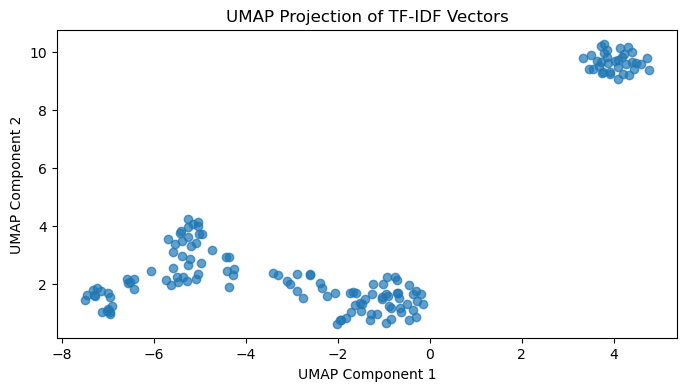

In [13]:
import umap

# Apply UMAP for Dimensionality Reduction
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X_tfidf.toarray())

# Visualize the transcripts in 2D
plt.figure(figsize=(8,4))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection of TF-IDF Vectors")
plt.show()

Assign a color to each channel to show if clusters are channel-specific or not

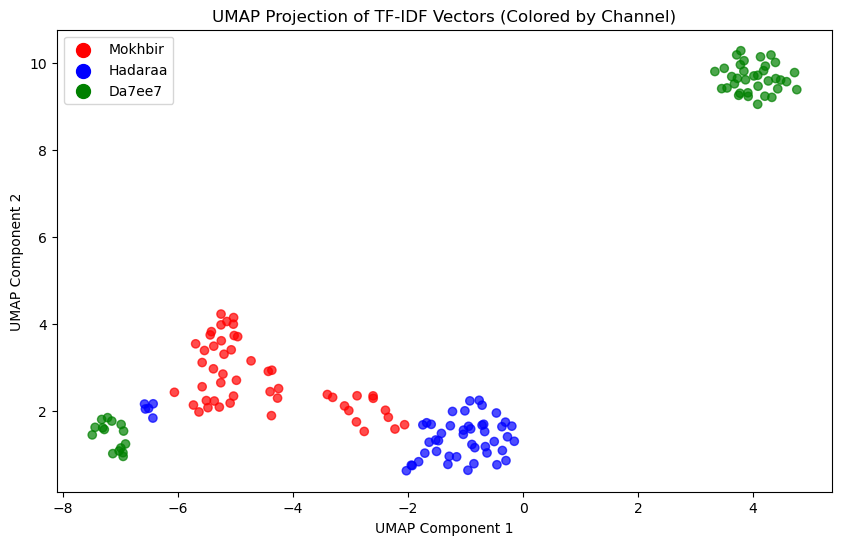

In [14]:
# Assign Colors to Each Channel
channel_colors = {
    'Mokhbir': 'red',
    'Hadaraa': 'blue',
    'Da7ee7': 'green'
}

colors = np.array([channel_colors[label] for label in labels])

# Visualize the transcripts in 2D with colors
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors, alpha=0.7)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection of TF-IDF Vectors (Colored by Channel)")

for channel, color in channel_colors.items():
    plt.scatter([], [], color=color, label=channel, s=100)  # Dummy points for legend

plt.legend()
plt.show()

Visualize the transcripts in 3D using UMAP

In [15]:
# Reduce dimensions using UMAP to 3D
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X_tfidf.toarray())

/opt/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
import plotly.graph_objects as go

def plot_3d_vectors(X_umap, labels=None, colors=None, title="3D Vector Representation"):
    """
    Plots a 3D vector representation of data points projected via UMAP.

    Parameters:
        X_umap (ndarray): 2D array of shape (n_samples, 3) containing 3D coordinates.
        labels (list, optional): List of labels corresponding to each data point.
        colors (list, optional): List of colors for each data point. If None, defaults to Plotly's automatic coloring.
        title (str, optional): Title of the plot.

    Returns:
        None: Displays the interactive 3D plot.
    """
    fig = go.Figure()

    # Determine axis scale
    axis_length = np.max(np.abs(X_umap)) * 1.2 

    # Add axis lines (for reference)
    fig.add_trace(go.Scatter3d(x=[-axis_length, axis_length], y=[0, 0], z=[0, 0], mode='lines',
                               line=dict(color='black', width=3), name="X-axis")) 
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[-axis_length, axis_length], z=[0, 0], mode='lines',
                               line=dict(color='black', width=3), name="Y-axis"))  
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, 0], z=[-axis_length, axis_length], mode='lines',
                               line=dict(color='black', width=3), name="Z-axis")) 

    # Plot vectors as rays
    for i in range(len(X_umap)):
        label = f"{labels[i]} {i+1}" if labels is not None else f"Vector {i+1}"
        
        fig.add_trace(go.Scatter3d(
            x=[0, X_umap[i, 0]],
            y=[0, X_umap[i, 1]],
            z=[0, X_umap[i, 2]],
            mode='lines+markers',
            marker=dict(size=5, color=colors[i] if colors is not None else None), 
            line=dict(width=3, color=colors[i] if colors is not None else None),
            name=label
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis=dict(title="UMAP Dim 1", backgroundcolor="rgb(240, 240, 240)"),
            yaxis=dict(title="UMAP Dim 2", backgroundcolor="rgb(240, 240, 240)"),
            zaxis=dict(title="UMAP Dim 3", backgroundcolor="rgb(240, 240, 240)"),
        ),
        width=900,
        height=700,
        showlegend=True
    )

    fig.show()

In [17]:
plot_3d_vectors(X_umap, labels=labels, colors=None, title="3D UMAP Projection of TF-IDF Vectors")

In [18]:
plot_3d_vectors(X_umap, labels=labels, colors=colors, title="3D UMAP Projection of TF-IDF Vectors (Colored by Channel)")

Apply KMeans clustering to the data

In [19]:
from sklearn.cluster import KMeans
# Apply K-Means Clustering
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
kmeans_labels = kmeans.fit_predict(X_umap)

cluster_colors = ['red', 'blue', 'green']
colors = [cluster_colors[label] for label in kmeans_labels]

In [20]:
plot_3d_vectors(X_umap, labels=labels, colors=colors, title="3D UMAP Projection of TF-IDF Vectors (Clustered by K-Means)")

### Apply NER to the transcripts to extract named entities and visualize the intersection between the entities extracted from the transcripts of the different channels using Venn diagrams
- Extract named entities from the transcripts using the `marefa-nlp/marefa-ner` model from the `huggingface` library
- Visualize the count of the entities extracted from the transcripts of the different channels using bar plots
- Visualize the intersection between the entities extracted from the transcripts of the different channels using Venn diagrams
- Visualize the intersection count using a venn diagram

Read NER from metadata

In [21]:
def read_ner_data(dir_path: str, df: pd.DataFrame) -> pd.DataFrame:
    """
    Load NER data from JSON files based on filenames in the DataFrame.

    :param dir_path: Path to the directory containing JSON files.
    :param df: DataFrame containing a 'file_name' column.
    :return: Updated DataFrame with NER data.
    """
    df["ner"] = None
    for i, row in df.iterrows():
        base_name = row["file_name"]
        json_path = os.path.join(dir_path, base_name + ".json")
        if os.path.exists(json_path):
            try:
                with open(json_path, 'r', encoding="utf-8") as f:
                    ner_data = json.load(f).get("ner", None)
                    df.at[i, "ner"] = ner_data
            except json.JSONDecodeError:
                print(f"Warning: Failed to decode JSON in {json_path}")
                df.at[i, "ner"] = None
        else:
            df.at[i, "ner"] = None

    return df

In [22]:
mokhbir_df = read_ner_data(MOKHBIR_DIR + "/metadata_with_ner", mokhbir_df)
mokhbir_df.head()

,file_name,episode_transcript,length,transcript_length,ner
0,المخبر_الاقتصادي__ما_علاقة_أمريكا_بالطائرة_الت...,ايران واذربيجان بينهم حدود طولها يتجاوز\nال 75...,1566,3570,"[{'token': 'ايران واذربيجان', 'label': 'locati..."
1,المخبر_الاقتصادي__لماذا_دمرت_إسرائيل_مطار_غزة_...,قطاع غزه بيتعرض في الاسابيع الاخيره\nلعدوان اج...,813,1771,"[{'token': 'قطاع غزه', 'label': 'location'}, {..."
2,المخبر_الاقتصادي__هل_تنجح_خطة_أمريكا_وأوروبا_ل...,الدول الغربية بقيادة الولايات المتحدة\nمستمرة ...,922,2181,"[{'token': 'الولايات المتحدة', 'label': 'locat..."
3,المخبر_الاقتصادي__كيف_استطاع_الأغنياء_اليهود_إ...,في 8 اكتوبر 2023 وبعد يوم واحد من انطلاق\nعملي...,1367,3218,"[{'token': '8 اكتوبر 2023', 'label': 'time'}, ..."
4,المخبر_الاقتصادي__لماذا_يكره_الفرنسيون_الدولار...,في 26 يناير سنه 1968 صحيفه انترناشونال\nهيرال ...,946,1927,"[{'token': '26 يناير سنه 1968', 'label': 'time..."


In [23]:
hadaraa_df = read_ner_data(HADARAA_DIR + "/metadata_with_ner", hadaraa_df)
hadaraa_df.head()

,file_name,episode_transcript,length,transcript_length,ner
0,الاستهلاك_الأخلاقي__أنت_مستهلك_غير_أخلاقي_اذهب...,"صديقي الإنسان!\nإيه يا ""رضا"" الداخلة دي؟\nأمن ...",893,2212,"[{'token': 'فنّان،', 'label': 'job'}, {'token'..."
1,ميكافيلي_ذو_الوجهين__في_الحضارة,"يا بوي!\nالله يحظّك ياد يا ""رضا""!\nاسمي ""ماستر...",1442,3844,"[{'token': 'أستاذ ""رضا""', 'label': 'person'}, ..."
2,في_الحضارة__أنا_آسف,"الاعتذار دا لـ""عادل"" صاحبي.\nأنا آسف يا صاحبي....",1014,2940,"[{'token': 'حرب ""العراق""،', 'label': 'event'},..."
3,هل_حقا_يستفيد_صديقي_الإنسان_من_المدارس__في_الح...,"والله ما كانش له لزوم التعب دا يا ست أم ""ميدو""...",629,1868,"[{'token': 'أم', 'label': 'person'}, {'token':..."
4,الزواج_عن_حب_أم_زواج_الصالونات_.._هل_ظلمنا_سي_...,"""لمّا تقرّب...\nأنا بأتونّس بيك\nوإمّا بتبعد.....",1076,3104,"[{'token': 'عليا', 'label': 'person'}, {'token..."


In [24]:
da7ee7_df = read_ner_data(DA7EE7_DIR + "/metadata_with_ner", da7ee7_df)
da7ee7_df.head()

,file_name,episode_transcript,ner
0,موسم جديد من برنامج الدحيح!,0.0: يا جماعه اللي قال لكم اني مت كداب ق\n6.54...,"[{'token': 'نستحمى', 'label': 'person'}, {'tok..."
1,تاريخ التشريح الدحيح,"7.82: أنا الدكتور ""ياسر الطائي""،\n10.259: أكتب...","[{'token': 'الطائي""،', 'label': 'person'}, {'t..."
2,آخر يوم في العالم الدحيح,0.986: انتم عارفين يا جماعة؟ احنا بقالنا\n13 ي...,"[{'token': 'الراجل خرملي', 'label': 'person'},..."
3,Chat GPT الدحيح,4.25: [موسيقى]\n10.32: [موسيقى]\n12.139: عمي ب...,"[{'token': 'بسيوني', 'label': 'person'}, {'tok..."
4,أحمد عدوية الدحيح,0.0: [موسيقى]\n3.6: راح فين يا فندم\n7.319: شا...,"[{'token': 'فندم', 'label': 'person'}, {'token..."


In [25]:
def get_unique_ner_tokens_and_tags(df: pd.DataFrame) -> set:
    """
    Extract unique (token, label) pairs from a DataFrame where each row in the 'ner' 
    column contains a list of dictionaries with 'token' and 'label' keys.

    :param df: DataFrame containing an 'ner' column with lists of dicts.
    :return: Set of unique (token, label) pairs.
    """
    unique_tokens_tags = set()

    for ner_data in df['ner']:
        if isinstance(ner_data, list): 
            for entity in ner_data:
                if isinstance(entity, dict) and 'token' in entity and 'label' in entity and  entity['label'] != 'time':
                    unique_tokens_tags.add((entity['token'], entity['label']))

    return unique_tokens_tags

In [26]:
mokhbir_ner = get_unique_ner_tokens_and_tags(mokhbir_df)
hadaraa_ner = get_unique_ner_tokens_and_tags(hadaraa_df)
da7ee7_ner = get_unique_ner_tokens_and_tags(da7ee7_df)

print("Unique NER Tokens & Tags in Al Mokhbir Al Eqtisadi:")
print(mokhbir_ner)

print("\nUnique NER Tokens & Tags in Fi Al Hadaraa:")
print(hadaraa_ner)

print("\nUnique NER Tokens & Tags in Da7ee7:")
print(da7ee7_ner)

Unique NER Tokens & Tags in Al Mokhbir Al Eqtisadi:
{('ترامب', 'person'), ('هتلر', 'person'), ('تلا ابيب', 'location'), ('جنود وضباط', 'job'), ('نيويورك تايمز', 'organization'), ('الرئيس', 'job'), ('البنوك الفيتناميه', 'organization'), ('ناشونال سيتي بنك', 'organization'), ('بوركينا فاسو', 'person'), ('هافانا كوبيه', 'location'), ('اي جي ديكسون', 'person'), ('الولايات المتحدة الأمريكية', 'location'), ('بايدن', 'person'), ('الصحفيه الامريكيه', 'job'), ('نهر اراس', 'location'), ('سد قيس قلعه سي', 'location'), ('الحكومه الصينيه', 'organization'), ('عم', 'job'), ('الطلاب', 'organization'), ('مطار العريش', 'location'), ('جامعه هارفارد', 'organization'), ('الميركافا', 'product'), ('الألمانية', 'nationality'), ('الولايات المتحدة', 'location'), ('شارلدي جول', 'person'), ('حصارها', 'event'), ('غرب ايران', 'location'), ('الاستخبارات بمجلس النواب الامريكي', 'organization'), ('الامريكيين الاسرائيليين', 'nationality'), ('جون كيربي', 'person'), ('للقوات الاوكرانيه', 'organization'), ('الحلقه', 'prod

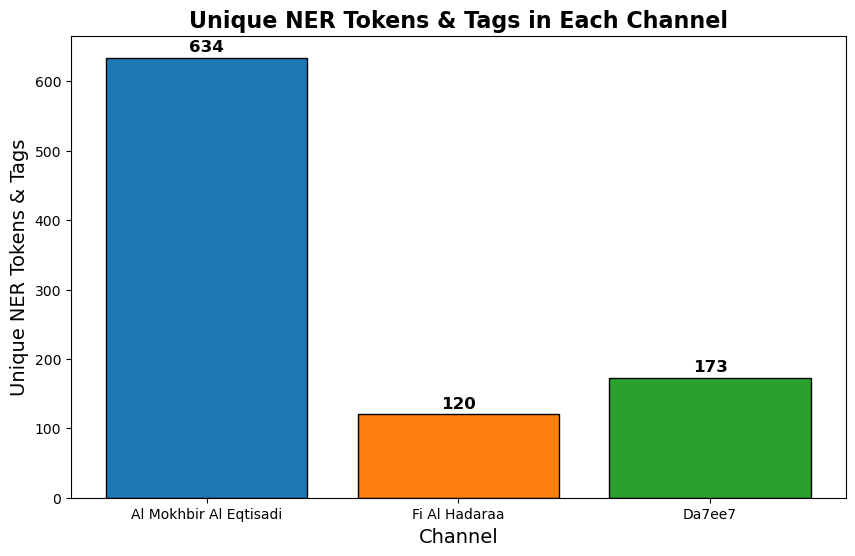

In [27]:
ner_counts = {
    'Al Mokhbir Al Eqtisadi': len(mokhbir_ner),
    'Fi Al Hadaraa': len(hadaraa_ner),
    'Da7ee7': len(da7ee7_ner)
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

plt.figure(figsize=(10, 6))
bars = plt.bar(ner_counts.keys(), ner_counts.values(), color=colors, edgecolor='black')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 5, 
        str(bar.get_height()), 
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.xlabel('Channel', fontsize=14)
plt.ylabel('Unique NER Tokens & Tags', fontsize=14)
plt.title('Unique NER Tokens & Tags in Each Channel', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
def get_ner_intersection(*ner_lists):
    """
    Compute the intersection of unique NER tokens and tags across multiple datasets.

    :param ner_lists: Multiple lists of NER entries, where each entry is a list of dictionaries
                      containing 'token' and 'label' keys.
    :return: A set containing the common (token, label) pairs across all datasets.
    """
    ner_sets = []
    
    for ner_list in ner_lists:
        ner_set = set()
        for ner_entry in ner_list:
            if isinstance(ner_entry, list):  # Ensure each row contains a list of dicts
                for entry in ner_entry:
                    if isinstance(entry, dict) and 'token' in entry and 'label' in entry:
                        ner_set.add((entry['token'], entry['label']))
        ner_sets.append(ner_set)

    if not ner_sets:
        return set()

    return set.intersection(*ner_sets)

set()


In [29]:
common_ner = get_ner_intersection(mokhbir_ner, hadaraa_ner, da7ee7_ner)
print(common_ner)

set()


After extracting the named entities from the transcripts, we wanted to compare the entities extracted from the different channels to see if there are any common entities between them. However, we found that there is no intersection between the entities extracted from the different channels. 

This could be due to the fact that the entities extracted from the transcripts are not accurate, since by looking at the entities extracted from the metadata, we found that:
- Some entities are not named entities
- Some entities are not named correctly since we are using a pre-trained model that might not be trained on the same domain as the transcripts
- There is an intersection between the channels but entities are of different wording (e.g. "السعودية" and "المملكة العربية السعودية")


So Although we can show no intersection directly, By examining the entities visually, we can't be sure that there is no intersection between the entities extracted from the different channels.